# 🐶 Dog breed classification

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# unzip data into google drive
#!unzip -u "/content/drive/My Drive/dogVision/dog-breed-identification.zip" -d "/content/drive/My Drive/dogVision/"

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# problem

Identify the dog breed

In [7]:
# data

kaggle's dog breed identification competition

In [8]:
# Evaluation

the evaluation is a file with prediction probabilities of each dog breed of each test image

In [9]:
# features

info about the data:
* we are dealing with image(unstructured)so its best we use deep learning/transfer learning
* there are 120 breeds of dog (120 different classes)
* 10000 + images in training(these images have labels) and test set(these images dont have labels)



# get workspace ready
* import Tensorflow 👍
* import Tensorflow Hub 👍
* Make sure we're using a GPU 👍

In [10]:
# import tensorflow into colab 

In [11]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version",tf.__version__)
print("TF HUB version",hub.__version__)

# check for GPU availability
print("GPU","available (YESS!!)" if tf.config.list_physical_devices("GPU")else "not available")

TF version 2.9.2
TF HUB version 0.12.0
GPU available (YESS!!)


## Getting our data ready (turning it into Tensors)

With all ml models, our data has to be in numerical format.( Turning our image to tensors (numerical representation))

ctrl M H for all shortcuts

In [12]:
# accessing our data. Checkout labels as data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dogVision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [13]:
labels_csv.shape

(10222, 2)

In [14]:
# how many images for each breed

labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

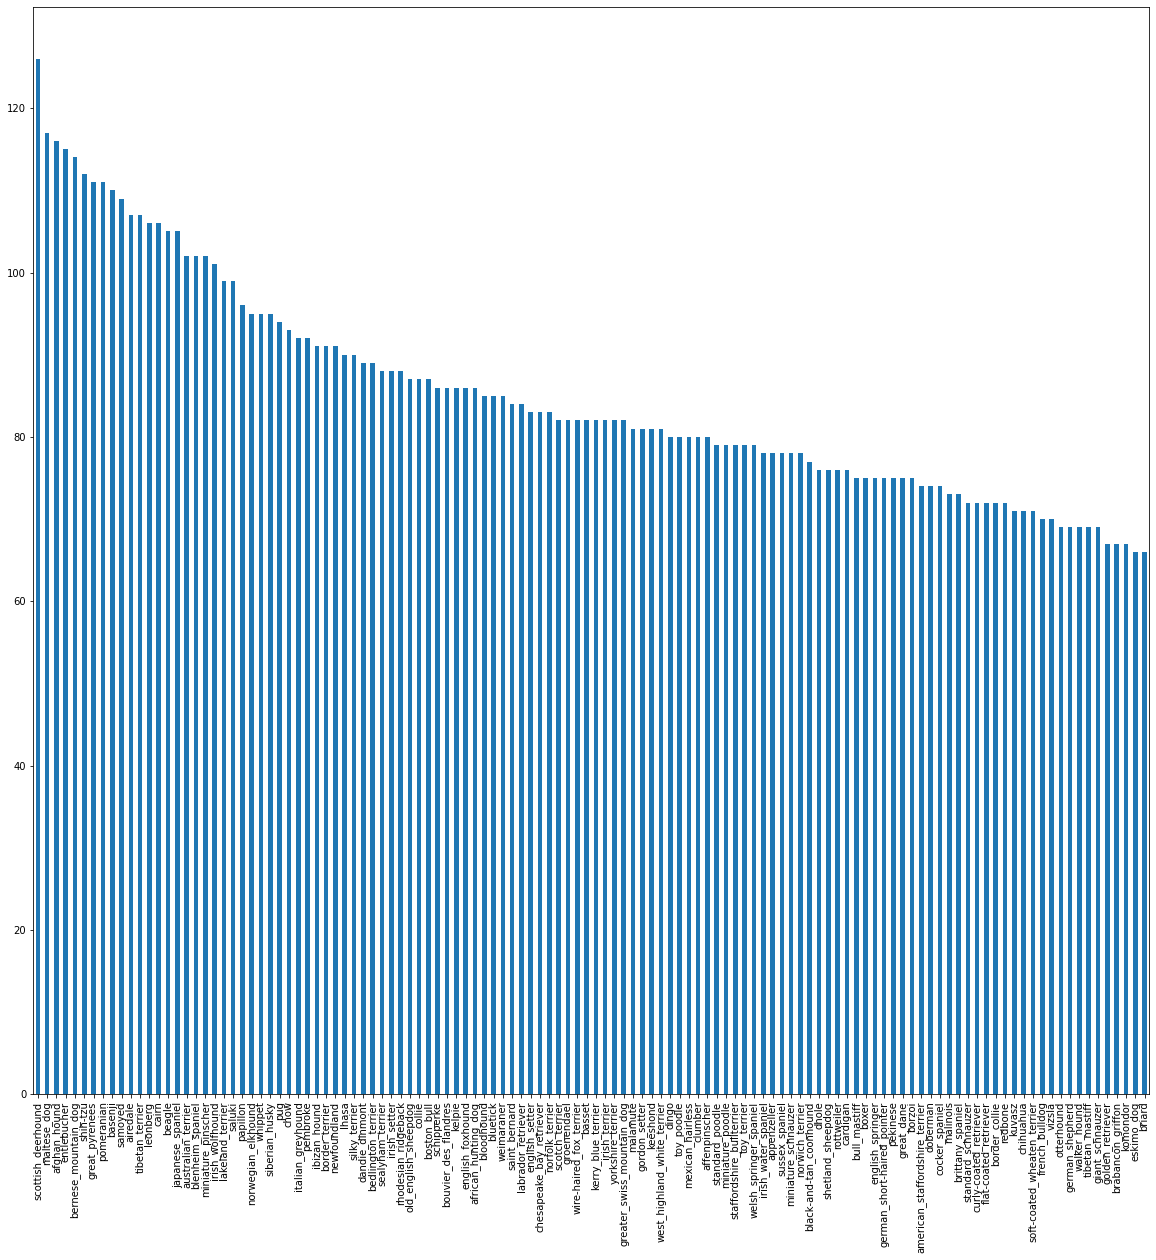

In [15]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,20));

In [16]:
labels_csv["breed"].value_counts().median()

82.0

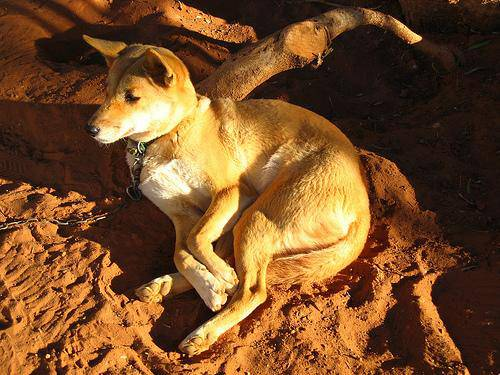

In [17]:
# Let's view an image

from IPython.display import Image
Image("/content/drive/MyDrive/dogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get list of all our image file pathnames

In [18]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
# Create pathnames from Image ID's

filename = ["/content/drive/MyDrive/dogVision/train/"+fname +".jpg" for fname in labels_csv["id"]]
filename[:10]

['/content/drive/MyDrive/dogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [20]:
len(filename), len(labels_csv) # check no of filenames matches with actual image files

(10222, 10222)

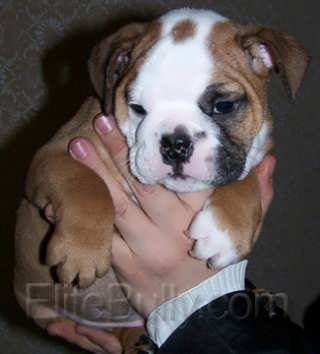

In [21]:
Image(filename[6000])

Since we've got our training image filepath's in a list , let's prepare our labels

In [22]:
import numpy as np
labels = np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [23]:
len(labels)

10222

In [24]:
len(labels) == len(filename)

True

In [25]:
# find unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [26]:
# turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [27]:
# trun every label into a boolean array

boolean_labels = [label==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [28]:
len(boolean_labels)

10222

In [29]:
print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

In [30]:
# Setup X and y
X = filename
y = boolean_labels

In [31]:
len(filename)

10222

# we're going to start off with ~1000 images and increase as needed

In [32]:
# set number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type:"slider",min:1000,max:10000}


In [33]:
# let's split our data into train and validation
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X[:NUM_IMAGES],
                                                         y[:NUM_IMAGES],
                                                         test_size=0.2,
                                                         random_state=42)
len(X_train),len(y_train),len(X_validate),len(y_validate)

(800, 800, 200, 200)

In [34]:
# let's have a look 
X_train[:5],y_train[:5]

(['/content/drive/MyDrive/dogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dogVision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dogVision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dogVision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dogVision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, Fa

# Preprocess images (image to tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into tensors
4. Normalize our image (convert colr channel values from 0-255 to 0-1)
5. Resize the `image` to be a size of (224,224)
6. Return the modified image

In [35]:
# Convert an image to a numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [36]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [37]:
# turn image to tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

we've seen how an image looks like a Tensor, let's make a function to preprocess them:

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable `image`
3. Turn our `image` (a jpg) into tensors
4. Resize the `image` to be a size of (224,224)
5. Return the modified image

In [38]:
# define image size
IMG_SIZE = 224

# Create a function for preprocessing images

def preprocess_image(image_path,img_size=IMG_SIZE):
  """
  Takes a image filepath and turns the image into a Tensor
  """
  # Read an image
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels
  image = tf.image.decode_jpeg(image,channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # resize the image to our desired value(224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  
  return image

In [39]:
tensor = tf.io.read_file(filename[42])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x01\x01^\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [40]:
tensor = tf.image.decode_jpeg(tensor,channels=3)
tensor

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 88, 138,  87],
        [ 75, 125,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  84],
        [ 76, 134,  86],
        [ 75, 133,  85]],

       [[ 71, 120,  73],
        [ 65, 115,  66],
        [ 62, 112,  63],
        ...,
        [ 73, 131,  83],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 54, 105,  64],
        [ 56, 107,  66],
        [ 62, 113,  72],
        ...,
        [ 70, 127,  82],
        [ 71, 128,  83],
        [ 72, 129,  84]],

       ...,

       [[  2,  11,  10],
        [  4,  13,  10],
        [  6,  15,  12],
        ...,
        [119, 112,  66],
        [125, 119,  71],
        [121, 115,  67]],

       [[  0,   3,   7],
        [  0,   7,   9],
        [  2,   8,   4],
        ...,
        [104,  97,  51],
        [111, 104,  58],
        [109, 102,  56]],

       [[ 16,  18,  30],
        [ 14,  19,  23],
        [ 15,  20,  13],
        ...,
        [ 99,  92,  4

In [41]:
tf.image.convert_image_dtype(tensor,tf.float32)

<tf.Tensor: shape=(257, 350, 3), dtype=float32, numpy=
array([[[0.34509805, 0.5411765 , 0.34117648],
        [0.29411766, 0.4901961 , 0.2901961 ],
        [0.24705884, 0.43529415, 0.23137257],
        ...,
        [0.29803923, 0.5254902 , 0.32941177],
        [0.29803923, 0.5254902 , 0.3372549 ],
        [0.29411766, 0.52156866, 0.33333334]],

       [[0.2784314 , 0.47058827, 0.28627452],
        [0.25490198, 0.45098042, 0.25882354],
        [0.24313727, 0.43921572, 0.24705884],
        ...,
        [0.28627452, 0.5137255 , 0.3254902 ],
        [0.2901961 , 0.5176471 , 0.32941177],
        [0.2901961 , 0.5176471 , 0.32941177]],

       [[0.21176472, 0.41176474, 0.2509804 ],
        [0.21960786, 0.41960788, 0.25882354],
        [0.24313727, 0.4431373 , 0.28235295],
        ...,
        [0.27450982, 0.49803925, 0.32156864],
        [0.2784314 , 0.5019608 , 0.3254902 ],
        [0.28235295, 0.5058824 , 0.32941177]],

       ...,

       [[0.00784314, 0.04313726, 0.03921569],
        [0.01

# Turn data into batches

Why turn our data into batches?

Let's say you're trying to process 10000+ images in one go... they might not fit into memory

So that's why we do about 32(this is the default batch size) images at a time (you can manually adjust the batch size if needed)

In order to use Tensorflow effectively, we need our data in th eform of Tensor tuples which look like this:
`(image,label)`

In [42]:
# create function to return a tuple (image,label)

def get_image_label(image_path,labels):
  """
  Take an image file path and the associated label,
  prcoesses the image and returns a tuple of (image,tuple)
  """

  image = preprocess_image(image_path)
  return image,labels

In [43]:
(get_image_label(X[42],tf.constant(y[42])))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

# Turning data into 2 batches


In [44]:
# define batch size , 32

BATCH_SIZE = 32

#Create a function to turn data into batches
def create_data_batches(X,y=None,batch_size=BATCH_SIZE, valid_data=False,test_data=False):
  """
  Creates batches of data out of image(X) and label(y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's a validation data.
  Also accepts test data as input (no labels)
  """
  # if test dataset , dont have labels
  if test_data:
    print("Creating test data batches....")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
  # if data is valid dataset , we dont need to shuffle it
  elif valid_data:
    print("Creating validation data...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Create training data batches...")
    # turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(y)))
    # shuffling pathnames and lables before mapping image processsor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch


In [45]:
# create training abd validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_validate,y_validate,valid_data=True)

Create training data batches...
Creating validation data...


In [46]:
# chekout diff attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## *Visualising* data batches

In [47]:
import matplotlib.pyplot as plt

# create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize=(10,10))
  # loop through 25
  for i in range(25):
    # create subplots (5 rows 5 columns)
    ax = plt.subplot(5,5,i+1)
    # display an image
    plt.imshow(images[i])
    # add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # turn the grid lines off
    plt.axis("off")

In [48]:
train_images,train_labels = next(train_data.as_numpy_iterator())

In [49]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [50]:
train_images,train_labels

(array([[[[0.6509804 , 0.7137255 , 0.77647066],
          [0.6509804 , 0.7137255 , 0.77647066],
          [0.6509804 , 0.7137255 , 0.77647066],
          ...,
          [0.25952643, 0.29385573, 0.31598893],
          [0.4286413 , 0.43142718, 0.45530462],
          [0.38526735, 0.3687407 , 0.3961917 ]],
 
         [[0.65925246, 0.72199756, 0.7847427 ],
          [0.65925246, 0.72199756, 0.7847427 ],
          [0.65925246, 0.72199756, 0.7847427 ],
          ...,
          [0.57086813, 0.6094296 , 0.6171086 ],
          [0.58640605, 0.6030225 , 0.61462975],
          [0.12472744, 0.12404468, 0.13522285]],
 
         [[0.6666667 , 0.7294118 , 0.79215693],
          [0.6666667 , 0.7294118 , 0.79215693],
          [0.6666667 , 0.7294118 , 0.79215693],
          ...,
          [0.17102045, 0.2141402 , 0.20415246],
          [0.2817018 , 0.3130373 , 0.29982835],
          [0.31684473, 0.3413392 , 0.32341418]],
 
         ...,
 
         [[0.38174897, 0.4288078 , 0.18567052],
          [0.32493

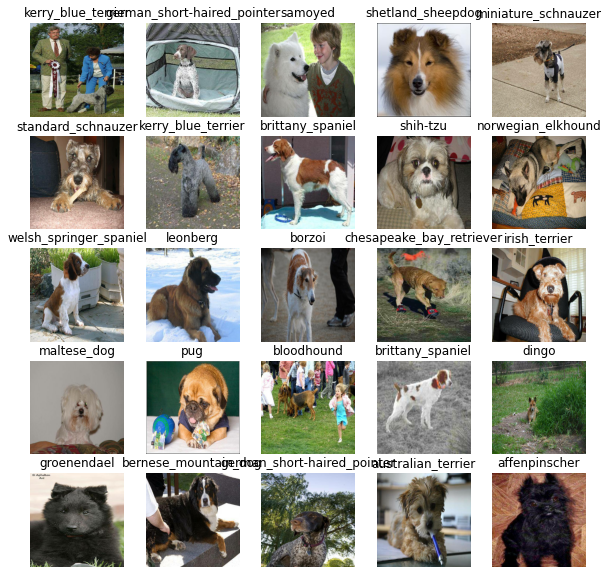

In [51]:
# visualise in training batch
show_25_images(train_images,train_labels)

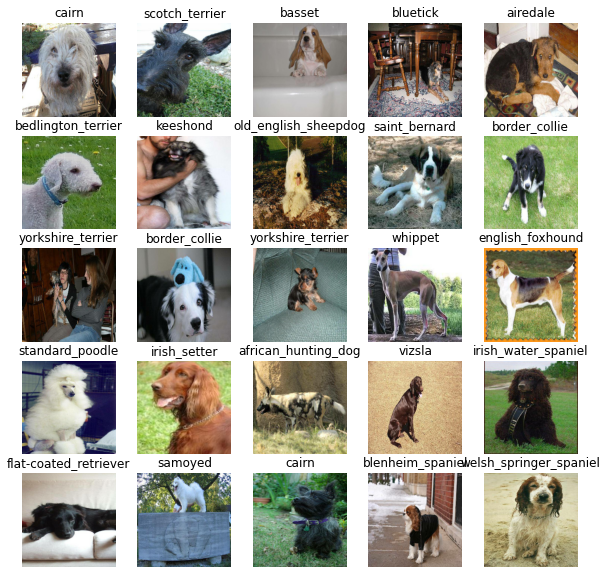

In [52]:
# visualising validation data
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model

* input shape (our images shape , in the form of tensors) to our model
* output shape (image labels, in the form of tensors ) of our model
* url of the model we want to use

In [58]:
# setup input shape to model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] # batch, height, width, colour channels

#setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from Tensorflow HUB
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

We've got our inputs, outputs and model ready t go.Let's put them together into a Keras deep learning model.

create a function 
* takes in input shape,output shape and the model we've chosen as parameters

* defines the layers in a Keras model in sequential fashion 

* compiles the model

* build the model

* return the model

In [59]:
# create a function which builds a keras model
def create_model(input_shapee=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  # setup the model
  model = tf.keras.Sequential([
     hub.KerasLayer(MODEL_URL), # layer 1 (INPUT LAYER)
     tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                           activation='softmax') # layer 2 (output layer) 
  ])
  # compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # build the model
  model.build(INPUT_SHAPE)
  return model


In [61]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## creating callbacks

callbacks are helper functions a model can use during training to do such
things as save its progress, check its progress or stop training early if a 
model stops improving.

we create 2 callbacks :
one for tensorboard - track our models progress
another for early stopping - prevents our model from training 
for too long

# TensorBoard Callback

1. Load Tensor board notebook extension
2. create a TensorBoard callback which is able to save logs to a directory and pass it our model's `fit()` function
3.Visualise our models training logs with the `%tensorboard` magic function (we'll do this after model training) 

In [62]:
# load tensorboard notebook extnesion
%load_ext tensorboard

In [68]:
import datetime
import os
# create a function to build tensorboard callback
def create_tensorboard_callback():
  #create a log directory for storing Tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/dogVision/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))# make it so the logs get tracked whenever we run an experiment
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback

early stopping helps to stop our model from overfitting if a certain
evaluation metric stops improving.

In [69]:
# create early stopping callabck

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## training a model (on subset of data)

our first model is only going to train on 1000 images , to
make sure everything is working

In [70]:
NUM_EPOCHS =100 # @param{type:"slider",min:10,max:100,step:10}

In [71]:
# check to make sure we're still runnig on GPU

print("GPU","available (YES!!!" if tf.config.list_physical_devices("GPU") else "GPU not available")

GPU available (YES!!!


# let's create a function which trains a model

* create a model using `ccreate_model()`
* setup a TensorBoard  callback using `create_tensorboard_callback()`
* call the `fit()` function on our model passing it the training data, number of epochs to
train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* return the model

In [73]:
# build a function to train and retuen a trained model

def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # create a model
  model = create_model()
  # create a tensorboard session everytime we train the model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
           epochs=NUM_EPOCHS,
           validation_data = val_data,
           validation_freq = 1,
           callbacks=[tensorboard, early_stopping])
  # return the fitted model
  return model

In [74]:
# fit the model to the data
model = train_model()

Epoch 1/100
25/25 [==============================] - 103s 4s/step - loss: 4.6035 - accuracy: 0.0775 - val_loss: 3.5163 - val_accuracy: 0.2200
Epoch 2/100
25/25 [==============================] - 3s 115ms/step - loss: 1.6446 - accuracy: 0.6837 - val_loss: 2.2008 - val_accuracy: 0.4500
Epoch 3/100
25/25 [==============================] - 3s 116ms/step - loss: 0.5610 - accuracy: 0.9350 - val_loss: 1.7101 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 4s 145ms/step - loss: 0.2545 - accuracy: 0.9850 - val_loss: 1.5156 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 4s 145ms/step - loss: 0.1460 - accuracy: 0.9962 - val_loss: 1.4524 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 3s 118ms/step - loss: 0.1014 - accuracy: 1.0000 - val_loss: 1.3895 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 4s 145ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 1.3689 - val_accuracy: 0.6450
